In [1]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Roshan B\Desktop\ML\Dataset\The_Developer_DataSet\Real_Estate.csv")

In [4]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [7]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [8]:
import seaborn as sns

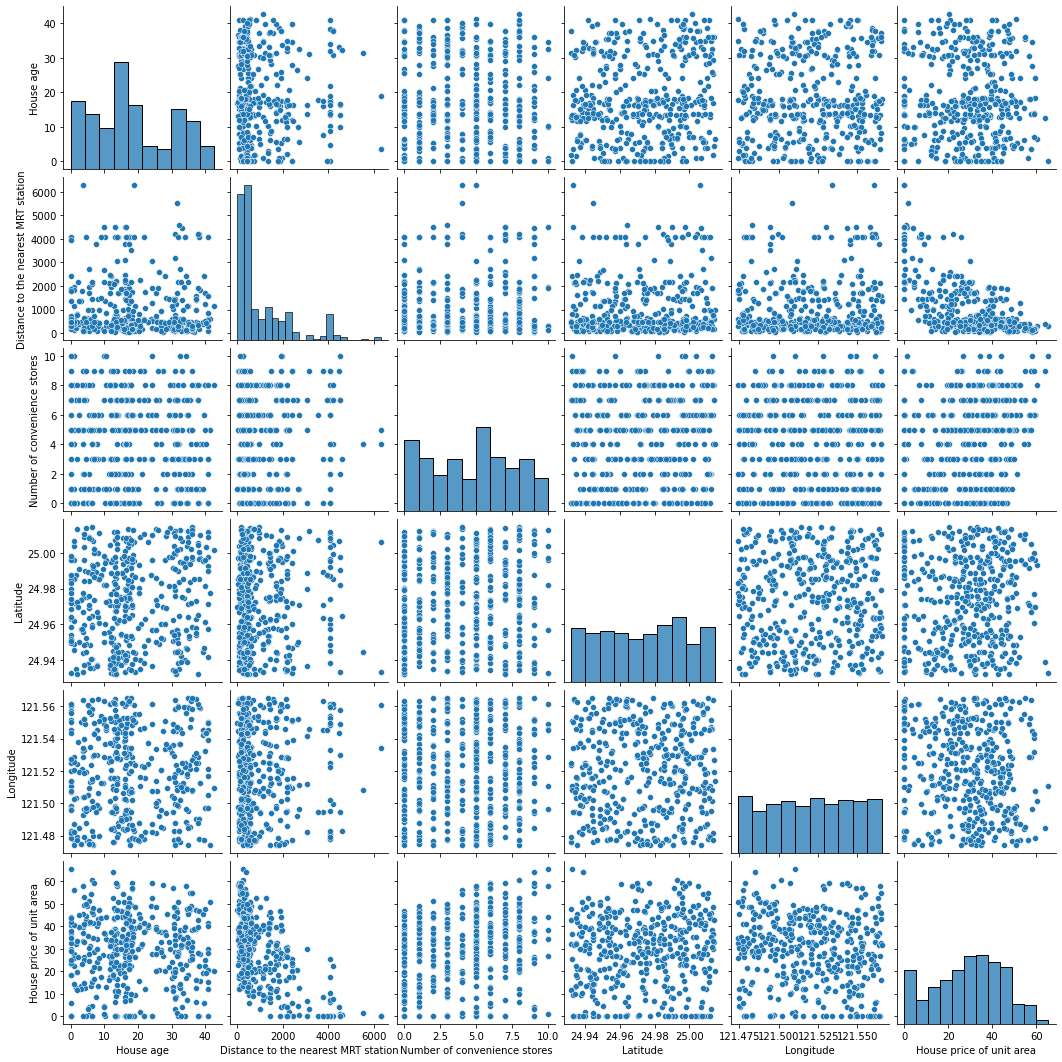

In [9]:
sns.pairplot(data=df)

C:\Users\Roshan B\AppData\Local\Temp\ipykernel_12256\569292376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot = True)


<AxesSubplot:>

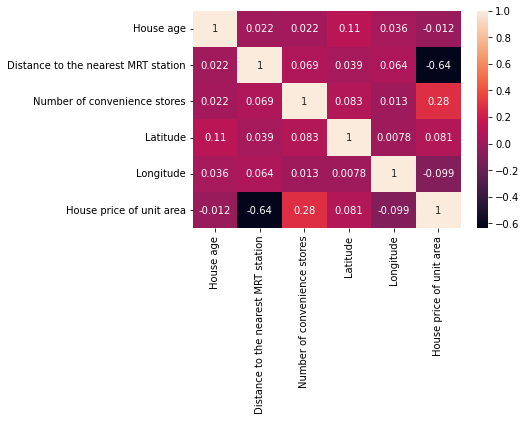

In [10]:
sns.heatmap(data=df.corr(),annot = True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
# selecting features and target variable

features = ['Distance to the nearest MRT station','Number of convenience stores']
target = 'House price of unit area'

In [16]:
features

['Distance to the nearest MRT station', 'Number of convenience stores']

In [17]:
target

'House price of unit area'

In [18]:
X = df[features]

In [19]:
X

,Distance to the nearest MRT station,Number of convenience stores
0,4082.01500,8
1,274.01440,2
2,1978.67100,10
3,1055.06700,5
4,967.40000,6
...,...,...
409,170.12890,6
410,323.69120,2
411,451.64190,8
412,292.99780,5


In [22]:
y = df[target]

In [23]:
y

0       6.488673
1      24.970725
2      26.694267
3      38.091638
4      21.654710
         ...    
409    29.096310
410    33.871347
411    25.255105
412    25.285620
413    37.580554
Name: House price of unit area, Length: 414, dtype: float64

In [24]:
# splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# model initializtion
model = LinearRegression()

In [26]:
# Training the model
model.fit(X_train,y_train)

LinearRegression()

In [28]:
pip install dash

     ---------------------------------------- 7.5/7.5 MB 763.1 kB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import joblib
joblib.dump(model, 'real_estate_price_model.pkl')

['real_estate_price_model.pkl']

In [36]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 127.0.0.1:8050
DEBUG:urllib3.connectionpool:http://127.0.0.1:8050 "GET /_alive_c6990d62-4d6a-45be-b9c8-1e95b0eacb91 HTTP/1.1" 200 5


C:\Users\Roshan B\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- distance_to_mrt
- latitude
- longitude
- num_convenience_stores
Feature names seen at fit time, yet now missing:
- Distance to the nearest MRT station
- Number of convenience stores




---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Input In [36], in update_output(
    n_clicks=2,
    distance_to_mrt=170,
    num_convenience_stores=6,
    latitude=24.98,
    longitude=121
)
     42     features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
     43                             columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
     44     # Predict
---> 45     prediction = model.predict(features)[0]
        features =    distance_to_mrt  num_convenience_stores  latitude  longitude
0              170                       6     24.98        121
        model = LinearRegression()
     46     return f'Predicted House Price of Unit Area: {prediction:.2f}'
     47 elif n_clicks > 0:

File ~\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:362, in LinearModel.predict(
    self=LinearRegression(),
   

In [35]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


DEBUG:root:n_clicks: 8, distance_to_mrt: 96740000, num_convenience_stores: 6
DEBUG:root:Features:    distance_to_mrt  num_convenience_stores
0         96740000                       6
C:\Users\Roshan B\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- distance_to_mrt
- num_convenience_stores
Feature names seen at fit time, yet now missing:
- Distance to the nearest MRT station
- Number of convenience stores


DEBUG:root:Prediction: -812622.7691883717
DEBUG:root:n_clicks: 9, distance_to_mrt: 96740000, num_convenience_stores: 6
DEBUG:root:Features:    distance_to_mrt  num_convenience_stores
0         96740000                       6
C:\Users\Roshan B\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
F